# Carga del documento

In [87]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## Descargar datos directamente desde Kaggle

- Crear un archivo `kaggle.json` con su token de autenticación
- Create a file `kaggle.json` with your authentication token (En kaggle $\to$ haga clic en el icono de usuario en la parte superior derecha $\to$ settings $\to$ API create new token)
- Subirlo a este espacio de trabajo portátil
- Ejecutar la siguiente celda

In [88]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## Descomprimir e inspeccionar datos

In [89]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [90]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## Cargar datos `train.csv` con pandas



In [91]:
import pandas as pd
import numpy as np

#z = pd.read_csv("train.csv")
#print ("shape of loaded dataframe", z.shape)
z = pd.read_csv("test.csv")
print ("shape of loaded dataframe", z.shape)
del z["Unnamed: 0"]

shape of loaded dataframe (692500, 12)


In [92]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Información general



considering that we have in total 692K data items, we have realatively few missing values on each column

In [93]:
z.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [94]:
z.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object


# Revisión de columnas

## Periodo

Posibilidades:

* Se puede separar el año del periodo en dos columnas y trabajarlo en numeros(Recomendado por el Profe) o como etiquetas.
* Trabajar los periodos como etiquetas o numeros.

Nota: Trabarla como etiquetas no nos permitiria predecir cosas que esten por fuera de esos periodos. Puede ser util para que el modelo tenga más capacidad de predecir los valores del test(Y sacar un mejor Acurracy), pero podria generar un sobre ajuste.

In [95]:
sorted(z.PERIODO.unique())

[20183, 20184, 20194, 20195, 20196, 20202, 20203, 20212, 20213]

In [10]:
#sorted(test.PERIODO.unique())

### Tratamiendo de columna: OneHot

In [96]:
df_onehot = pd.get_dummies(z['PERIODO'], prefix='PER')
z = pd.concat([z, df_onehot], axis=1)

In [97]:
z = z.drop(columns=['PERIODO'])

In [98]:
z.head()

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,PER_20194,PER_20195,PER_20196,PER_20202,PER_20203,PER_20212,PER_20213
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,False,False,False,False,False,False,True,False
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,False,False,False,False,False,False,True,False
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,False,False,False,False,False,True,False,False
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,False,False,True,False,False,False,False,False
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,False,False,False,False,False,False,True,False


## Programa Academico

**Importante**: Una posible opción es clasificar las carreras como Ingenieria, Licenciatura, Ciencias Exactas, etc. Son muchas carreras para hacer onehot.



*   El examen tiene areas como matematicas, Lectura Crítica, Sociales y Ciudadanas, ciencias naturales e ingles tal vez eso ayude a predecir.
*   Buscar carreras con una distancia de edicion cortas como posibles carreras duplicadas.
*   (¿Otras ideas?)



In [99]:
len(sorted(z.ESTU_PRGM_ACADEMICO.unique()))

948

Nota: En este caso decidimos por organizar por tematica principal

### Tratamiento de columna: Reducción de etiqueta, mapeo y variable nominal

In [100]:
len(z.ESTU_PRGM_ACADEMICO.unique())

948

In [101]:
import pandas as pd
import numpy as np
import re

# Function to categorize academic programs based on keywords
def categorize_program(program):
    program = program.lower()  # Convert to lowercase for easier matching

    # Define mappings based on common keywords
    if re.search(r'admin|ges|neg|fin|conta', program):
        return 'Administracion_y_Negocios'

    elif re.search(r'(inge(nier.a)?)', program):
        return 'Ingenieria'

    elif re.search(r'lice|edu|pedago', program):
        return 'Licenciatura'

    elif re.search(r'(med.+?c(.+?)?[ao](\b|^))|(salud)|(farma)|(psic)|(terapia)|(veteri)|(enfer)', program):
        return 'Medicina'

    elif re.search(r'\bderecho|juridic', program):
        return 'Derecho'

    elif re.search(r'merc|publici|tecnia', program):
        return 'Mercadeo_y_Publicidad'

    elif re.search(r'comput', program):
        return 'Computacion'

    elif re.search(r'dise|art(e|.sti)|m[uú]s|cine|telev|audiovis|fotog|danz|tea|core', program):
        return 'Artes'

    elif re.search(r'cienc((.+?\bnat)|.+?^)|geo|bio|qu.m|f.sic|amb', program) and not re.search(r'edu|deporte|recre', program):
        return 'Ciencias'

    elif re.search(r'cienc.+?soci|sociolo|human|antropolog|histor|filos|', program):
        return 'Ciencias_Sociales_y_Humanidades'

    elif re.search(r'filol|letr', program):
        return 'Letras'

    elif re.search(r'idio|leng|extr|espa..?ol|ingl|fran', program):
        return 'Lenguas'

    else:
        return 'Otros'


In [102]:
len(z.ESTU_PRGM_ACADEMICO.unique())

948

In [103]:
sorted(z.ESTU_PRGM_ACADEMICO.unique())

['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES',
 'ACTIVIDAD FISICA Y DEPORTE',
 'ACUICULTURA',
 'ADMINISTRACION',
 'ADMINISTRACION  FINANCIERA',
 'ADMINISTRACION & SERVICIO',
 'ADMINISTRACION AERONAUTICA',
 'ADMINISTRACION AGROPECUARIA',
 'ADMINISTRACION AMBIENTAL',
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES',
 'ADMINISTRACION BANCARIA Y FINANCIERA',
 'ADMINISTRACION COMERCIAL',
 'ADMINISTRACION COMERCIAL Y DE MERCADEO',
 'ADMINISTRACION DE COMERCIO EXTERIOR',
 'ADMINISTRACION DE EMPRESAS',
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES',
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
 'ADMINISTRACION DE EMPRESAS COMERCIALES',
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
 'ADMINISTRACION DE EMPRESAS TURISTICA',
 'ADMINISTRACION DE EMPRESAS TURISTICAS',
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS',
 'ADMINISTRACION DE EMPRESAS Y FINANZAS',
 'ADMINISTRACI

In [104]:
z.ESTU_PRGM_ACADEMICO

,ESTU_PRGM_ACADEMICO
0,ENFERMERIA
1,DERECHO
2,MERCADEO Y PUBLICIDAD
3,ADMINISTRACION DE EMPRESAS
4,PSICOLOGIA
...,...
692495,BIOLOGIA
692496,PSICOLOGIA
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL
692498,PSICOLOGIA


In [105]:
z['Categoria'] = z['ESTU_PRGM_ACADEMICO'].apply(categorize_program)
z['Categoria'].value_counts()

,count
Categoria,
Administracion_y_Negocios,201457
Ingenieria,146551
Medicina,98394
Ciencias_Sociales_y_Humanidades,87176
Licenciatura,66661
Derecho,53696
Artes,17770
Mercadeo_y_Publicidad,12344
Ciencias,8307


In [106]:
del z["ESTU_PRGM_ACADEMICO"]
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,PER_20194,PER_20195,PER_20196,PER_20202,PER_20203,PER_20212,PER_20213,Categoria
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,False,False,False,False,False,False,True,False,Medicina
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,False,False,False,False,False,False,True,False,Derecho
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,False,False,False,False,False,True,False,False,Mercadeo_y_Publicidad
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,False,False,True,False,False,False,False,False,Administracion_y_Negocios
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,False,False,False,False,False,False,True,False,Medicina


#### OneHot

In [107]:
df_onehot = pd.get_dummies(z['Categoria'])
z = pd.concat([z, df_onehot], axis=1)
del z["Categoria"]
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,...,False,False,False,False,False,False,False,False,True,False


In [108]:
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,Administracion_y_Negocios,Artes,Ciencias,Ciencias_Sociales_y_Humanidades,Computacion,Derecho,Ingenieria,Licenciatura,Medicina,Mercadeo_y_Publicidad
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,...,False,False,False,False,False,False,False,False,True,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,...,False,False,False,False,False,True,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,...,False,False,False,False,False,False,False,False,False,True
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,...,True,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,...,False,False,False,False,False,False,False,False,True,False


## Departamento

In [109]:
len(z.ESTU_PRGM_DEPARTAMENTO.unique())

31

In [110]:
len(sorted(z.ESTU_PRGM_DEPARTAMENTO.unique()))

31

### Tratamiendo de columna: Variable nominal

In [111]:
#Se eliminan los espacios para poder acceder a la variables asi: z.EL_DEPARTAMENTO
z['ESTU_PRGM_DEPARTAMENTO'] = z['ESTU_PRGM_DEPARTAMENTO'].str.replace(' ', '_')
sorted(z.ESTU_PRGM_DEPARTAMENTO.unique())

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTÁ',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAVIARE',
 'HUILA',
 'LA_GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE_SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SANTANDER',
 'SAN_ANDRES',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES']

#### OneHot

In [114]:
df_onehot = pd.get_dummies(z['ESTU_PRGM_DEPARTAMENTO'], prefix='DEP')
z = pd.concat([z, df_onehot], axis=1)

In [115]:
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,...,False,False,False,False,True,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,...,False,False,False,False,False,False,False,False,False,False


In [116]:
z.drop(columns=['ESTU_PRGM_DEPARTAMENTO'], inplace=True)

In [117]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


# Decisiones de las columnas con NAN

## Con el precio de la matricula

Posibildades de preprocesamiento:


*   Agrupar en clases y trabajarlo como variables ordinales. Ejemplo : No pago matricula: 0, Menos de 500 mil: 1, ...
*   Promedio de los valores.
*  Agarrar el inferior o el  superior.
*  Trabajarlo como etiquetas (OneHot)


Posibiliades para la valores nulos:

*   Media
*   Moda
*   Mediana
*   Descartarlos
*   Por un valor particular
*   Cosiderar que no pagaron nada

In [118]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [119]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, 6287, 0.009078700361010831)

### Tratamiento de la columna: Variable ordinal

In [120]:
z.ESTU_VALORMATRICULAUNIVERSIDAD

,ESTU_VALORMATRICULAUNIVERSIDAD
0,Entre 5.5 millones y menos de 7 millones
1,Entre 2.5 millones y menos de 4 millones
2,Entre 2.5 millones y menos de 4 millones
3,Entre 4 millones y menos de 5.5 millones
4,Entre 2.5 millones y menos de 4 millones
...,...
692495,Entre 500 mil y menos de 1 millón
692496,Entre 2.5 millones y menos de 4 millones
692497,Entre 1 millón y menos de 2.5 millones
692498,Entre 2.5 millones y menos de 4 millones


In [121]:
cmap = {'No pagó matrícula': 0,
        'Menos de 500 mil': 1,
        'Entre 500 mil y menos de 1 millón': 2,
        'Entre 1 millón y menos de 2.5 millones': 3,
        'Entre 2.5 millones y menos de 4 millones': 4,
        'Entre 4 millones y menos de 5.5 millones': 5,
        'Entre 5.5 millones y menos de 7 millones': 6,
        'Más de 7 millones': 7}

z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(cmap)

z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()
z.head()

<ipython-input-121-521481af3a60>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(cmap)


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de los NaN: Mediana

In [122]:
# Calcular la mediana de la columna 'ESTU_VALORMATRICULAUNIVERSIDAD'
mediana = z['ESTU_VALORMATRICULAUNIVERSIDAD'].median()

# Reemplazar los valores NaN con la mediana
z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)

# Verificar la mediana aplicada
print("Mediana utilizada para reemplazo:", mediana)

Mediana utilizada para reemplazo: 3.0


<ipython-input-122-66155b3a2268>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(mediana, inplace=True)


In [123]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, 0, 0.0)

## Con las horas semanales trabajadas por los estudiantes




Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   Introducir la parte superior
  *   Introducir la parte inferior
  *   "0":0, 'Menos de 10 horas':1, ...
* Valores cuantitavos
  *   Promedio aritmetico o geometrico

Con los NA:

* Cualitativa:
  *   Eliminar
  *   **Moda**
  *   Convertir en 0
  *   Convertir en -1
  *   Hacer imputacion con inferencia de otras columnas

* Cuantitativa:
  *   Media
  *   Mediana



In [124]:
z.ESTU_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [125]:
z.ESTU_HORASSEMANATRABAJA.isna().sum()/z.shape[0]

0.04455884476534296

### Tratamiento de la columna: Variable ordinal

In [126]:
# Defino el orden para los valores ordinales
horas_trabajo_mapping = {
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    }

# Convierto la columna en tipo categórico ordinal
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)
z.ESTU_HORASSEMANATRABAJA.value_counts()

# Verifico los cambios
print(z['ESTU_HORASSEMANATRABAJA'].value_counts())
z.ESTU_HORASSEMANATRABAJA.unique()

ESTU_HORASSEMANATRABAJA
4.0    249352
0.0    116550
2.0    115857
3.0     92693
1.0     87191
Name: count, dtype: int64


<ipython-input-126-1fdeaaa84c90>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)


array([ 1.,  0.,  4.,  3.,  2., nan])

### Tratamiento de los NaN: Moda

In [127]:
# Reemplazo los valores NaN con la moda
moda = z['ESTU_HORASSEMANATRABAJA'].mode()[0]
z['ESTU_HORASSEMANATRABAJA'].fillna(moda, inplace=True)
print(moda)

4.0


<ipython-input-127-a992a3c8bbd8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['ESTU_HORASSEMANATRABAJA'].fillna(moda, inplace=True)


In [128]:
z.ESTU_HORASSEMANATRABAJA.head()

,ESTU_HORASSEMANATRABAJA
0,1.0
1,0.0
2,4.0
3,0.0
4,3.0


## Con el estrato de vivienda

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   "Sin Estrato":0, "Estrato 1":1, 'Estrato 2':2, ...
  *   "Sin Estrato":1, "Estrato 1":2, 'Estrato 2':3, ...

Los NA:

*   Eliminarlos
*   Convertirlos sin estrato.
*   ¿Los sin estrato son otro na?
*   Hacer imputacion con inferencia de otras columnas

In [129]:
z.FAMI_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [130]:
z.FAMI_ESTRATOVIVIENDA.isna().sum(),z.FAMI_ESTRATOVIVIENDA.isna().sum()/z.shape[0]

(32137, 0.046407220216606496)

In [131]:
z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape

(3289, 90)

In [132]:
z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0], (z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0])/z.shape[0]

(35426, 0.05115667870036101)

### Tratamiento de la columna: Variable ordinal

In [133]:
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Reemplazamos los valores categóricos por los numéricos
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace(estrato_mapping)

### Tratamiento de los NaN: Distribución de probabilidad

In [134]:
# Paso 1: Reemplazar "Sin Estrato" con NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

# Paso 2: Rellenar los NaN aleatoriamente usando una distribución de probabilidad
# Obtener los valores sin NaN
non_nan_values = z['FAMI_ESTRATOVIVIENDA'].dropna()

# Probabilidades según la frecuencia de aparición
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].apply(fill_random)

<ipython-input-134-328b68cb568d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)


In [135]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Con el hecho de tener internet o no

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si es estrato 3 para arriba "sí", sino "no".

In [136]:
z.FAMI_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [137]:
z.FAMI_TIENEINTERNET.isna().sum(),z.FAMI_TIENEINTERNET.isna().sum()/z.shape[0]

(26629, 0.038453429602888084)

In [138]:
len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "Si"]), len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "No"])

(592514, 73357)

### Tratamiento de la columna: Variable ordinal

In [139]:
# Defino el orden para los valores ordinales
tiene_internet_mapping = {
        'No': 0,
        'Si': 1
    }

# Convierto la columna en tipo categórico ordinal
z.FAMI_TIENEINTERNET = z.FAMI_TIENEINTERNET.replace(tiene_internet_mapping)
z.FAMI_TIENEINTERNET.value_counts()

# Verifico los cambios
print(z['FAMI_TIENEINTERNET'].value_counts())
z.FAMI_TIENEINTERNET.unique()

FAMI_TIENEINTERNET
1.0    592514
0.0     73357
Name: count, dtype: int64


<ipython-input-139-e84929a24e3f>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.FAMI_TIENEINTERNET = z.FAMI_TIENEINTERNET.replace(tiene_internet_mapping)


array([ 1.,  0., nan])

### Tratamiento de los NaN: Moda


In [140]:
# Calcular la moda de la columna 'FAMI_TIENEINTERNET'
moda = z['FAMI_TIENEINTERNET'].mode()[0]

# Reemplazar los valores NaN con la moda
z['FAMI_TIENEINTERNET'].fillna(moda, inplace=True)

# Verificar la moda aplicada
print("Moda utilizada para reemplazo:", moda)


Moda utilizada para reemplazo: 1.0


<ipython-input-140-f8de6d11aa3b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['FAMI_TIENEINTERNET'].fillna(moda, inplace=True)


In [141]:
z.FAMI_TIENEINTERNET

,FAMI_TIENEINTERNET
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
692495,1.0
692496,1.0
692497,1.0
692498,0.0


## Educación padre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.
    * (Otra)

* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [142]:
z.FAMI_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [143]:
z.FAMI_EDUCACIONPADRE.isna().sum(),z.FAMI_EDUCACIONPADRE.isna().sum()/z.shape[0]


(23178, 0.03347003610108303)

In [144]:
z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0])/z.shape[0]

(48999, 0.07075667870036101)

### Tratamiento de la columna: Variable ordinal

In [145]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(educacion_graduados_mapping)

<ipython-input-146-0ed37ca5c25d>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(educacion_graduados_mapping)


### Tratamiento de los NaN: Distribución de probabilidad

In [147]:
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONPADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].apply(fill_nan_random)

In [148]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Educación madre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.
    * (Otra)

* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [149]:
z.FAMI_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [150]:
z.FAMI_EDUCACIONMADRE.isna().sum(),z.FAMI_EDUCACIONMADRE.isna().sum()/z.shape[0]


(23664, 0.03417184115523466)

In [151]:
z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0])/z.shape[0]

(28599, 0.041298194945848375)

In [152]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de la columna: Variable ordinal

In [153]:
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(educacion_graduados_mapping)

<ipython-input-153-ebce82763cae>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(educacion_graduados_mapping)


### Tratamiento de los NaN: Distribución de probabilidad

In [154]:
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONMADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].apply(fill_nan_random)

In [155]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Pago su propia matricula

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si trabaja mas de 10 para arriba "sí", sino "no".

Nota: Se podria hacer cuantitativa combinando con la columna valor matricula.

Decisión: Valores cualitativos y eliminar los nan.

Nota: Es posible que se haya intentado ingresar un numero en vez de una de las opciones? Pues el nan aparece en estas situaciones que se emplea un numero para realizar operaciones pero el formato fue erroneo o no tenia sentido, por lo que podria haber sido un intento de ingresar el valor pagado?

In [156]:
z.ESTU_PAGOMATRICULAPROPIO.unique()

array(['No', 'Si', nan], dtype=object)

In [157]:
z.ESTU_PAGOMATRICULAPROPIO.isna().sum(),z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0]


(6498, 0.009383393501805054)

In [158]:
z.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


### Tratamiento de los NaN: Moda

In [159]:
# Calcular la moda de la columna 'ESTU_PAGOMATRICULAPROPIO'
moda = z['ESTU_PAGOMATRICULAPROPIO'].mode()[0]

# Reemplazar los valores NaN con la moda
z['ESTU_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)

# Verificar la moda aplicada
print("Moda utilizada para reemplazo:", moda)

Moda utilizada para reemplazo: No


<ipython-input-159-86e1d43e3dc8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['ESTU_PAGOMATRICULAPROPIO'].fillna(moda, inplace=True)


In [160]:
(z.shape[0], z.ESTU_PAGOMATRICULAPROPIO.isna().sum(), z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0])

(692500, 0, 0.0)

###Tratamiento de la columna: Variable nominal

#### OneHot

In [161]:
df_onehot = pd.get_dummies(z['ESTU_PAGOMATRICULAPROPIO'], prefix='PAGOMATRICULAPROPIO')
z = pd.concat([z, df_onehot], axis=1)

In [162]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PER_20183,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,No,medio-alto,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,No,alto,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,True,False


In [163]:
z.drop(columns=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,medio-alto,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,bajo,False,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,bajo,False,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,alto,False,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,medio-bajo,False,False,...,False,False,False,False,False,False,False,False,True,False


# Variable objetivo

Posibilidades:


*   Convetir en numeros por ser variable cualitativa ordinal, ya que justo, "alto" es mejor que "medio-alto".
*   Balancear la proporción de las etiquetas. Se puede hacer generando datos para equilibrar(submuestreo o sobremuestreo).

Posibles modelos que no necesitan de balancear:

In [164]:
sorted(z.RENDIMIENTO_GLOBAL.unique())

['alto', 'bajo', 'medio-alto', 'medio-bajo']

<Axes: >

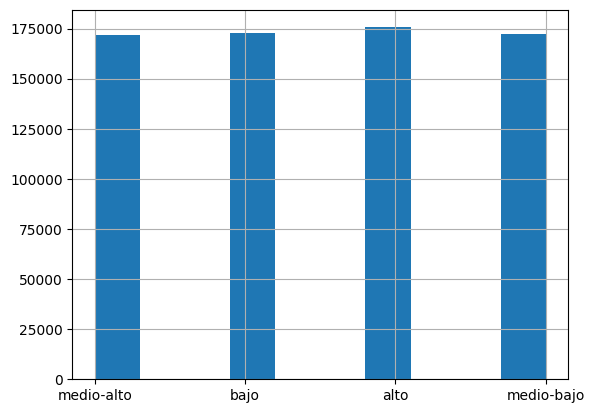

In [165]:
z.RENDIMIENTO_GLOBAL.hist()

## Convertir la columna objetivo (predicción) en valores discretos


In [166]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = z[y_col].replace(rmap)
z.head()

<ipython-input-166-4f00fef8d378>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z[y_col] = z[y_col].replace(rmap)


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,3,False,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,False


# Analisis

In [167]:
z.dtypes.value_counts()

,count
bool,83
float64,6
int64,2


# Preprocesamientos



*   Normalización.
$$z=\frac{X-max(x)}{min(x)}$$
*   Estandarización.

$$z=\frac{X-media(x)}{devestad(x)}$$



In [168]:
(5-3)/1

2.0

# Selección de caracteristicas



*   Selección Basada en la varianza


```
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza menor a un umbral
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
```



*   Selección Basada en la Correlacion


```
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(X.T)

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.show()

```

* Selección Basada en la importacia del modelo
  * Arboles de Decisión


  ```
  from sklearn.ensemble import RandomForestClassifier

  # Entrenar el modelo de Random Forest
  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  # Extraer la importancia de cada característica
  importances = model.feature_importances_

  # Visualizar las características más importantes
  feature_names = df.columns
  sorted_indices = np.argsort(importances)[::-1]
  plt.bar(range(X.shape[1]), importances[sorted_indices])
  plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
  plt.show()
  ```


  * Random Forest
  * Gradient Boosting
  * XGBoost


```
from xgboost import XGBClassifier
from xgboost import plot_importance

# Entrenar el modelo XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Mostrar la importancia de las características
plot_importance(xgb)
plt.show()
```



* RFE(Metodos recursivos de eliminación)


```
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Crear un modelo base
model = LogisticRegression()

# Inicializar RFE con el modelo
selector = RFE(estimator=model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_selected = selector.transform(X_train)

```

* Y faltan...






In [169]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,3,False,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [170]:
z.replace(["False", "Fals", "F"], 0, inplace=True)
z.replace(["True"], 1, inplace=True)

z.replace([False], 0, inplace=True)
z.replace([True], 1, inplace=True)

<ipython-input-170-b3119b8821b2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.replace([True], 1, inplace=True)


In [171]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PER_20183,PER_20184,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,3,0,0,...,0,0,1,0,0,0,0,0,1,0
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [172]:
z.isna().sum()

,0
ID,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
...,...
DEP_TOLIMA,0
DEP_VALLE,0
DEP_VAUPES,0
PAGOMATRICULAPROPIO_No,0


In [173]:
z.dtypes.value_counts()

,count
int64,85
float64,6


In [ ]:
z.to_csv('test_preprocesamiento3.csv', index=False)